In [247]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from matplotlib.gridspec import GridSpec
# from mpl_toolkits.mplot3d import Axes3D

In [194]:
n_qubits = 4
n_pulses = 80
t_model = 100

data = []

for count in range(1,11):

    try: 
        file_path = f'RESULTS/4_qubits/{n_pulses}_pulses_{t_model}_tmodel/{count}/{n_pulses}_pulses_{t_model}_tmodel_simulation_data.pickle'

        print(file_path)

        file = open(file_path, 'rb')

        data.append(pickle.load(file))

        print(f'Succesfully loaded {file_path}')
    except: continue

        



RESULTS/4_qubits/80_pulses_100_tmodel/1/80_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_100_tmodel/2/80_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_100_tmodel/2/80_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_100_tmodel/3/80_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_100_tmodel/3/80_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_100_tmodel/4/80_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_100_tmodel/4/80_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_100_tmodel/5/80_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_100_tmodel/5/80_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/80_pulses_100_tmodel/6/80_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/80_pulses_100_tmodel/6/80_pulses_100_tmodel_simu

In [195]:
n_runs = len(data)
data[0]['energies']

losses = np.array([data[i]['energies'] for i in range(len(data))])

In [196]:
mean_losses = np.mean(losses, axis=0)
std_losses = np.std(losses, axis=0)


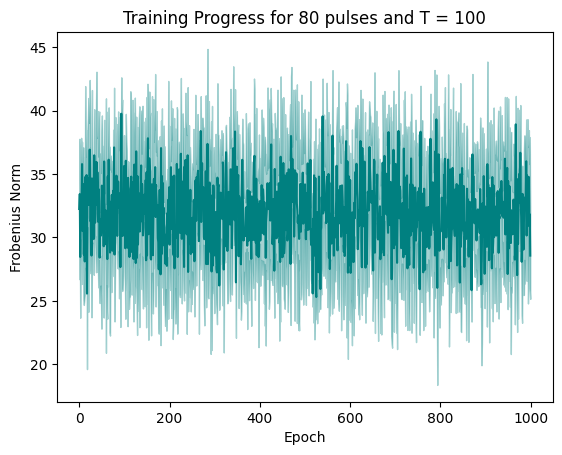

In [197]:
# Plotting the mean values
x = [i for i in range(len(mean_losses))]
plt.plot(x, mean_losses, color = 'teal')

# Creating the shaded region for standard deviations
plt.fill_between(x, mean_losses - std_losses, mean_losses + std_losses, color='teal', alpha=0.35)

# Adding labels and legend
plt.xlabel('Epoch')
plt.ylabel('Frobenius Norm')
plt.title(f'Training Progress for {n_pulses} pulses and T = {t_model}')
# plt.legend()

save_path = f'RESULTS/4_qubit_plots/{t_model}/{n_pulses}_pulses_{t_model}_tmodel.pdf'

plt.savefig(save_path)
# Showing the plot
plt.show()

# Joint plots

In [198]:
def load_data(n_pulses, t_model):

    data = []

    for count in range(1,11):

        try: 
            file_path = f'RESULTS/4_qubits/{n_pulses}_pulses_{t_model}_tmodel/{count}/{n_pulses}_pulses_{t_model}_tmodel_simulation_data.pickle'

            print(file_path)

            file = open(file_path, 'rb')

            data.append(pickle.load(file))

            print(f'Succesfully loaded {file_path}')
        except: continue

    return data

In [260]:
many_pulses = [i for i in range(5,85,5)]
t_model = 100



In [261]:
data_dict = { f'{n_pulses}':load_data(n_pulses, t_model) for n_pulses in many_pulses}  

RESULTS/4_qubits/5_pulses_100_tmodel/1/5_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/5_pulses_100_tmodel/1/5_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/5_pulses_100_tmodel/2/5_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/5_pulses_100_tmodel/2/5_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/5_pulses_100_tmodel/3/5_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/5_pulses_100_tmodel/3/5_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/5_pulses_100_tmodel/4/5_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/5_pulses_100_tmodel/4/5_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/5_pulses_100_tmodel/5/5_pulses_100_tmodel_simulation_data.pickle
Succesfully loaded RESULTS/4_qubits/5_pulses_100_tmodel/5/5_pulses_100_tmodel_simulation_data.pickle
RESULTS/4_qubits/5_pulses_100_tmodel/6/5_pulses_100_tmodel_simulation_data.pickle
Suc

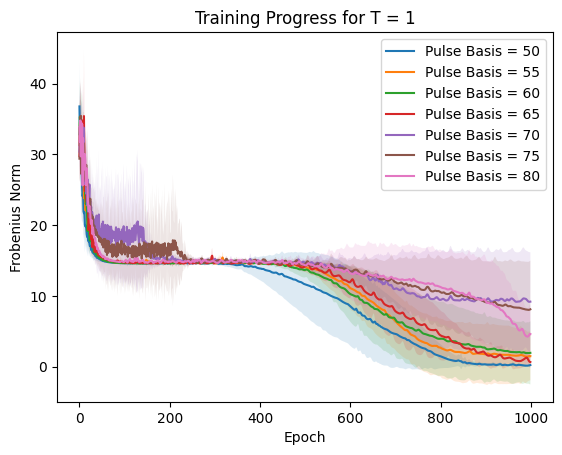

In [245]:

pulse_plots = [50,55,60,65,70,75,80]


for n_pulses in pulse_plots:

    losses = np.array([dd['energies'] for dd in data_dict[f'{n_pulses}']])

    mean_losses = np.mean(losses, axis=0)
    std_losses = np.std(losses, axis=0)


    # Plotting the mean values
    x = [i for i in range(len(mean_losses))]
    plt.plot(x, mean_losses, label = f'Pulse Basis = {n_pulses}')

    # Creating the shaded region for standard deviations
    plt.fill_between(x, mean_losses - std_losses, mean_losses + std_losses, alpha=0.15)



# Adding labels and legend
plt.xlabel('Epoch')
plt.ylabel('Frobenius Norm')
plt.title(f'Training Progress for T = {t_model}')
plt.legend()

# save_path = f'RESULTS/4_qubit_plots/20_25_30_35_40_{1}_tmodel.pdf'

# plt.savefig(save_path)
# Showing the plot
plt.show()

In [262]:
len(many_pulses)

16

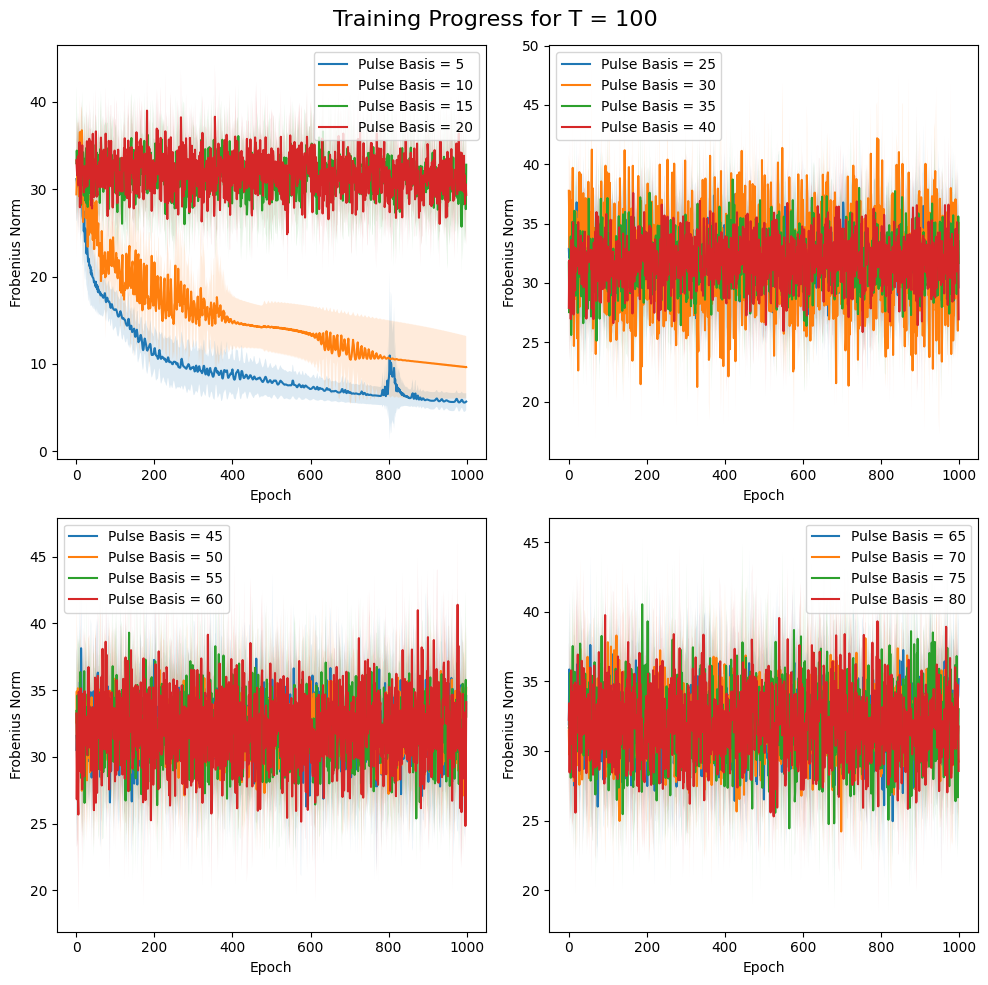

In [263]:
# Create a figure
fig = plt.figure(figsize=(10, 10))

# Create a GridSpec object for a 2x2 grid layout
gs = GridSpec(2, 2, figure=fig)

# Create the subplots
ax1 = fig.add_subplot(gs[0, 0]) # Top-left
ax2 = fig.add_subplot(gs[0, 1]) # Top-right
ax3 = fig.add_subplot(gs[1, 0]) # Bottom-left
ax4 = fig.add_subplot(gs[1, 1]) # Bottom-right


top_left = [5,10,15,20]
top_right = [25,30,35,40]
bottom_left = [45,50,55,60]
bottom_right = [65,70,75,80]

settings = [(ax1, top_left), (ax2, top_right), (ax3, bottom_left), (ax4, bottom_right)]


for (ax, pulses) in settings:


    for n_pulses in pulses:

        losses = np.array([dd['energies'] for dd in data_dict[f'{n_pulses}']])

        mean_losses = np.mean(losses, axis=0)
        std_losses = np.std(losses, axis=0)


        # Plotting the mean values
        x = [i for i in range(len(mean_losses))]
        ax.plot(x, mean_losses, label = f'Pulse Basis = {n_pulses}')

        # Creating the shaded region for standard deviations
        ax.fill_between(x, mean_losses - std_losses, mean_losses + std_losses, alpha=0.15)

        ax.set_xlabel('Epoch')
        ax.set_ylabel('Frobenius Norm')

        ax.legend()



fig.suptitle(f'Training Progress for T = {t_model}', fontsize=16)

plt.tight_layout()

save_path = f'RESULTS/4_qubit_plots/all_pulses_{t_model}_tmodel.pdf'

plt.savefig(save_path)

plt.show()
